In [135]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib import rcParams 
rcParams['figure.figsize'] = 14, 10

In [6]:
data = pd.read_csv('creditcard.csv')

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# metric

In [30]:
def get_TP(y_true, y_pred):
    return sum((y_true==1)&(y_pred==1))

def get_FP(y_true, y_pred):
    return sum((y_true==0)&(y_pred==1))

def get_FN(y_true, y_pred):
    return sum((y_true==1)&(y_pred==0))

def get_TN(y_true, y_pred):
    return sum((y_true==0)&(y_pred==0))

In [31]:
import numpy as np
def find_conf_matrix_values(y_true,y_pred):
    # calculate TP, FN, FP, TN
    TP = get_TP(y_true,y_pred)
    FN = get_FN(y_true,y_pred)
    FP = get_FP(y_true,y_pred)
    TN = get_TN(y_true,y_pred)
    return TP,FN,FP,TN
def my_confusion_matrix(y_true, y_pred):
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return np.array([[TN,FP],[FN,TP]])

## Accuracy

In [2]:
# homework
def my_accuracy_score(y_true, y_pred):
    # calculates the fraction of samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return (TP+TN)/(TP+TN+FP+FN)

# Precision

In [43]:
# homework
def my_precision_score(y_true, y_pred):
    # calculates the fraction of predicted positives samples that are actually positive
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return TP/(TP+FP)

## Recall

In [40]:
# homework
def my_recall_score(y_true, y_pred):
    # calculates the fraction of positive samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return TP/(TP+FN)

## f1-score 

In [37]:
# homework
def my_f1_score(y_true, y_pred):
    # calculates the F1 score
    recall = my_recall_score(y_true,y_pred)
    precision = my_precision_score(y_true,y_pred)
    return 2*precision*recall/(precision+recall)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
train,test = train_test_split(data,test_size = 0.3,stratify=data['Class'])

In [36]:
test['Class'].value_counts()

0    85295
1      148
Name: Class, dtype: int64

# 不使用weight的结果


In [51]:
lr = LogisticRegression(solver='liblinear',class_weight=None)

In [52]:
lr.fit(X=train.drop('Class',1),y=train['Class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
y_pred=lr.predict(X=test.drop('Class',1))


In [16]:
from sklearn.metrics import f1_score

In [55]:
f1_score(np.array(test['Class']),y_pred)

0.6527777777777778

In [32]:
find_conf_matrix_values(np.array(test['Class']),y_pred)

(133, 15, 1888, 83407)

In [54]:
my_f1_score(np.array(test['Class']),y_pred)

0.6527777777777778

# 使用weights的结果

In [82]:
weights = np.linspace(0.15, 0.95, 9)

In [154]:
weight_score = {}
weights

array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])

In [155]:
for weight in weights:
    weight_dict = {0:round(1-weight,2),1:round(weight,2)}
    lr_weighted = LogisticRegression(solver='liblinear',class_weight=weight_dict)
    lr_weighted.fit(X=train.drop('Class',1),y=train['Class'])
    y_pred_weighted=lr_weighted.predict(X=test.drop('Class',1))
   
    weight_score[weight] = f1_score(np.array(test['Class']),y_pred_weighted)
    print(weight, weight_score[weight])

0.15 0.4732142857142857
0.25 0.5213675213675214
0.35 0.4816326530612245
0.44999999999999996 0.6408450704225352
0.5499999999999999 0.7238805970149254
0.6499999999999999 0.6381578947368421
0.75 0.7449664429530201
0.85 0.7378640776699028
0.95 0.7289719626168225


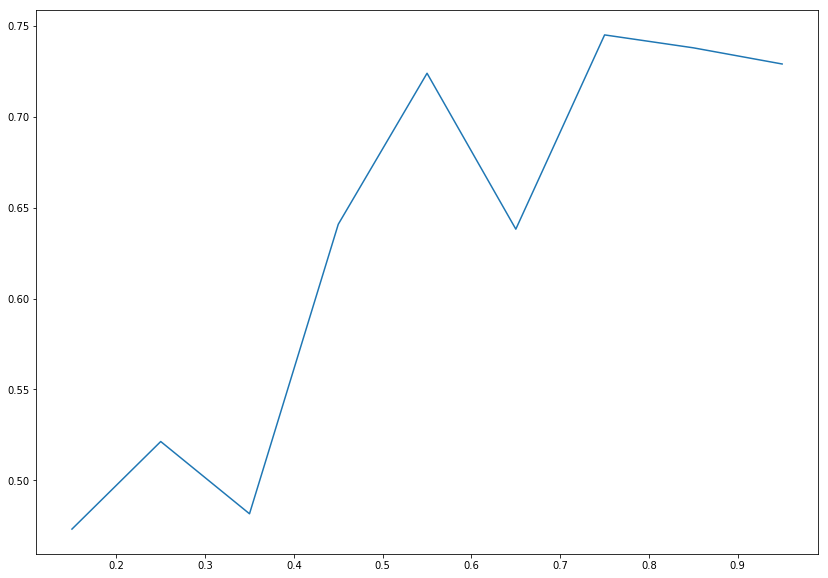

In [156]:
plt.plot(weight_score.keys(),weight_score.values())